# Sprawozdanie Eksploracja Danych
## Laboratorium 3 - 27.11.2024

Zbadanie wpływu parametrów `r` oraz `k` na działanie funkcji znajdującej wartości odbiegające od reszty, korzystając z metody odległości od k-najbliższego sąsiada.

Szymon Moździerz\
Krzysztof Żelazny\
Adrian Sławiński

### Cele sprawozdania:
1. Zbadanie wpływu ilości przedziałów wykorzystanych do przedstawienia danych na histogramie danego rozkładu, na zgodność wykresu z teorią.
2. Zbadanie wpływu parametrów `r` oraz `k` na liczbę oraz rozkład znajdowanych, przez testowaną funckję, wartości odbiegających od normy.

## Wykorzystane biblioteki

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Ziarno

Dla zapewnienia powtarzalności otrzymywanych wyników, wprowadzone zostało stałę ziarno. 

In [8]:
np.random.seed(1)

## Eksperyment 1

Pierwszy eksperyment polegał na sprawdzeniu jaki wpływ na wygląd histogramu ma liczba binów (przedziałów danych), na które został on podzielony.\
Rozkład wynikowy złożony był z 2 rozkładów normalnych, `N(3, 1)` oraz `N(7, 1)`, po odpowiednio `40%` i `30%` wszystkich próbek oraz rozkładu jednorodnego `J(0, 10)` stanowiącego `30%` wszystkich próbek w ramach zapewnienia szumu.\
Liczba próbek została ustawiona na 1000, a badanie zostało przeprowadzone dla wartości 10, 20, 50, 100 binów.

In [9]:
sample_size = 1000
x_values = np.concatenate([np.random.normal(3, 1, int(0.4 * sample_size)),
                     np.random.normal(7, 1, int(0.3 * sample_size)),
                     np.random.uniform(0, 10, int(0.3 * sample_size))])
y_values = [0 for _ in range(sample_size)]

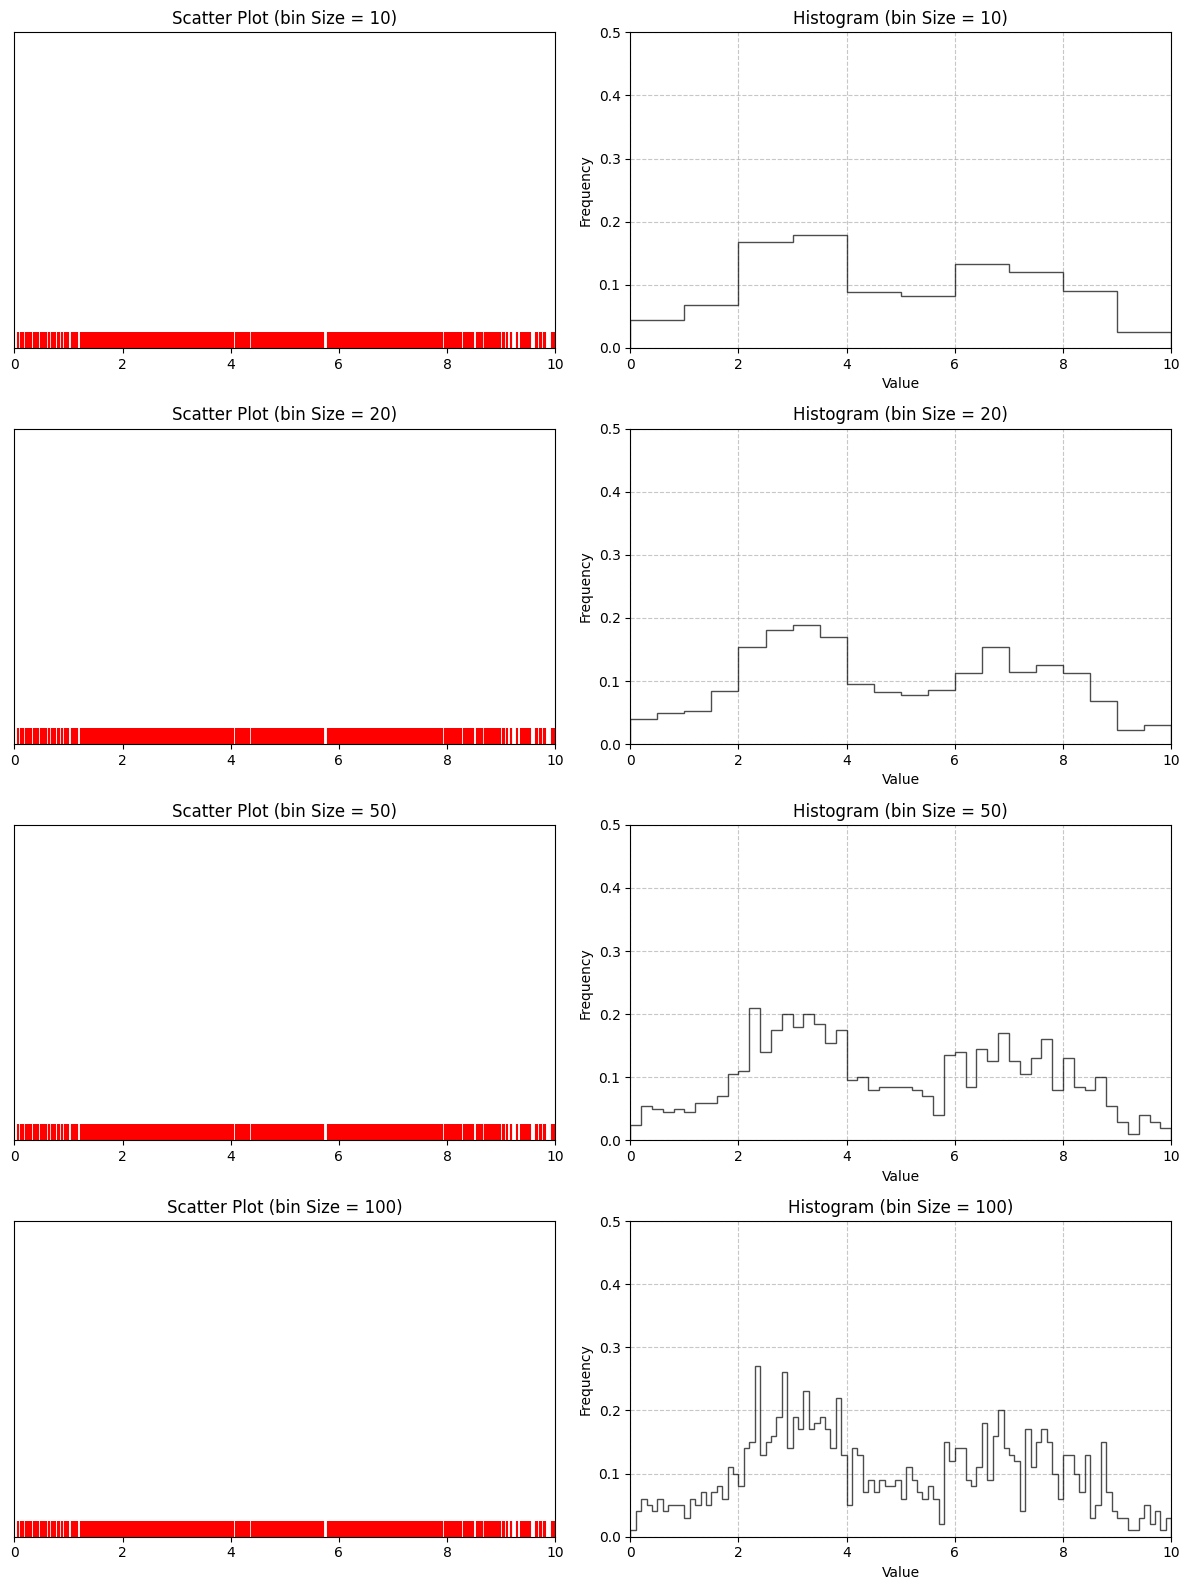

In [10]:
bin_sizes = [10, 20, 50, 100]
fig, axes = plt.subplots(len(bin_sizes), 2, figsize=(12, len(bin_sizes) * 4))

for idx, bin_size in enumerate(bin_sizes):
    axes[idx, 0].scatter(x_values, y_values, marker='|', s=500, c='r')
    axes[idx, 0].set_title(f'Scatter Plot (bin Size = {bin_size})')
    axes[idx, 0].set_ylim(0, 0.5)
    axes[idx, 0].set_xlim(0, 10)
    axes[idx, 0].set_yticks([])

    bins = np.linspace(0, 10, num=bin_size + 1)

    axes[idx, 1].hist(x_values, bins=bins, edgecolor='black', alpha=0.7, histtype='step', fill=False, density=True)
    axes[idx, 1].set_title(f'Histogram (bin Size = {bin_size})')
    axes[idx, 1].set_xlabel('Value')
    axes[idx, 1].set_ylabel('Frequency')
    axes[idx, 1].set_ylim(0, 0.5)
    axes[idx, 1].set_xlim(0, 10)
    axes[idx, 1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Wnioski

Można zauważyć, że przy niskich wartościach, histogram jest dość ogólny i niektóre szczegóły rozkładu zostają z tego powodu utracone (5, 10 binów, dla tych danych wejściowych). Dla małych binów widoczny jest fragment, który nie powinnien zawierać żadnych wystąpień, spowodowane jest to zbyt dużą szerokością poszczególnych binów.\
Najlepsze wyniki osiągnięte zostały dla wartości 20 oraz 50 binów, bardzo dobrze są wtedy ukazane rzeczywiste odwzorowanie danych z wyraźnie widocznymi słupkami histogramu.\
Przy zbyt dużej liczbie binów, cały histogram staje się nieczytelny, co uniemożliwia wyciągnięcie z niego jakichkolwiek sensownych wniosków.

# Eksperyment 2

Celem drugiego eksperymentu było znalezienie elementów odstających od pozostałych i wyrysowanie ich na wykresie. Elementem odstającym może być punkt, który znaczący sposób wyróżnia się z tłumu lub jest na jego krańcach w zależności od rozkładu danych.\
Metodą, która została użyta do znajdywania elemntów odstających w zadaniu jest metoda odgległościowa. Polega ona na obliczeniu odgległości euklidesową pomiędzy każdymi dwoma punktami, w taki sposób tworzymy macierz odległości. Następnie indeksy są sortowane według wartości rosnąco, przechowywane są indeksy k (zmienna odpowiadająca liczbie najbliższych sąsiadów) najbliższych punktów dla każdego punktu. Wyznaczona zostanie tablica maksymalnych odległości do k-tych najbliższych sąsiadów i zostanie posortowana. Nastęnie zostanie policzone przy pomocy parametru r( parametr mówi jaką część danych będzie traktowane jako elementy odstające) threshold od, którego będą znajdowane elementy odstające. Na koniec zostaną zwrócone indeksy, które przekraczają treshold.


In [11]:
def find_outliers(data, k, r):
    n = len(data)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i, j] = np.sqrt(np.sum((data[i] - data[j]) ** 2))

    sorted_indices = np.argsort(dist_matrix, axis=1)
    k_closest_indices = sorted_indices[:, 1:k+1]
    max_distances = np.zeros(n)

    for i in range(n):
        max_distances[i] = max(dist_matrix[i, k_closest_indices[i]])

    sorted_max_distances = np.sort(max_distances)
    threshold_index = int((1 - r) * n)
    threshold = sorted_max_distances[threshold_index]

    outliers = np.where(max_distances > threshold)[0]

    return outliers, max_distances

Można zauważyć, że dla rozpatrywanego przypadku próbka badawcza to 1000 punktów, przez co 0,05 z całości to około 50 punktów.

In [12]:
k = 5
r = 0.05

y_values = np.array(y_values)
data = np.column_stack((x_values, y_values))

outliers, max_distances = find_outliers(data, k, r)
print(outliers)
print(len(outliers))

[ 75 205 249 336 337 339 362 411 421 424 530 565 652 705 712 719 724 731
 753 759 778 781 786 789 803 813 848 850 852 853 862 864 866 869 889 897
 909 920 922 924 929 937 940 943 954 958 970 979 987]
49


## Macierz wyników

Dla badanej próbki utworzono macierz parametrów, sprawdzając jak zachowa się rozkład elementów odstających. 

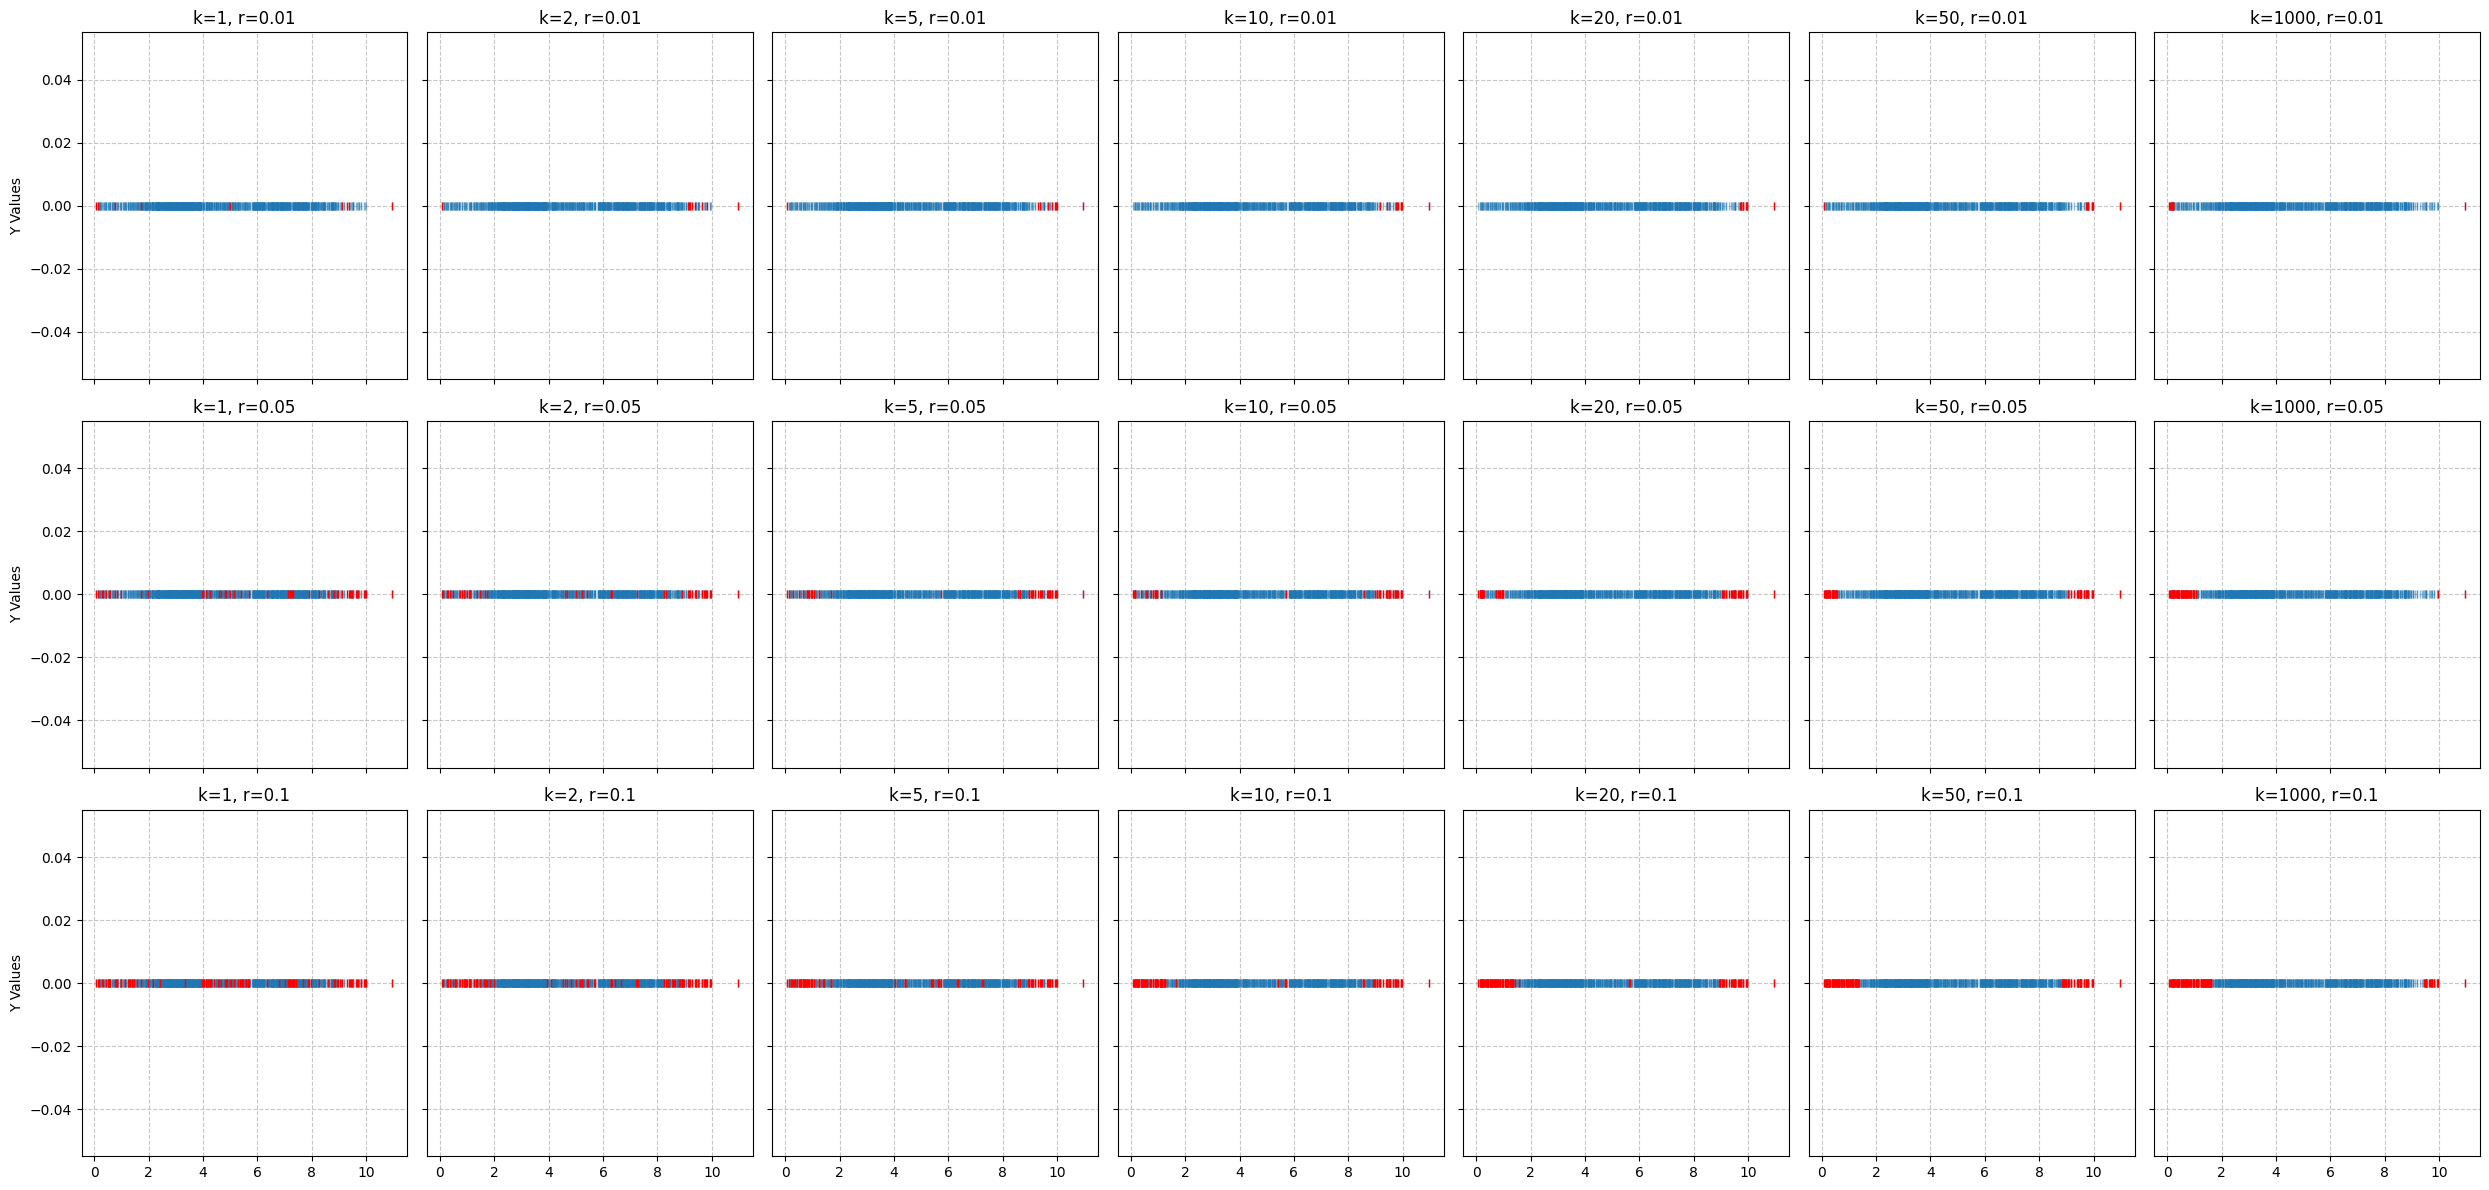

In [18]:
k_array = [1, 2, 5, 10, 20, 50,1000]
r_array = [0.01, 0.05, 0.1]

fig, axes = plt.subplots(len(r_array), len(k_array), figsize=(25, 12), sharex=True, sharey=True)

for i, r in enumerate(r_array):
    for j, k in enumerate(k_array):
        outliers, max_distances = find_outliers(data, k, r)

        ax = axes[i, j]
        ax.plot(x_values, y_values, '|', label='Data', alpha=0.5)
        ax.plot(x_values[outliers], y_values[outliers], '|', label='Outliers', color='red')
        ax.set_title(f'k={k}, r={r}')
        ax.grid(True, linestyle='--', alpha=0.7)
        if i == len(k_array) - 1:
            ax.set_xlabel("X Values")
        if j == 0:
            ax.set_ylabel("Y Values")

plt.tight_layout()
plt.show()

# Wnioski

Dla poniższych wykresów zauważono, że przy małym k i r pojawiają się częste cięcia, elementy nietypowe są porozrzucane wszędzie. Taka informacja jest mało przydatna, że takie rzeczy występują wszędzie. Zwiększając tylko parametr powoli wykresy będą przekształcać się, że dane nietypowe będą znajdować się obok siebie. Aby do tego doprowadzić, należy dobrać parametr k w zależności od parametru r, ponieważ wraz ze wzrostem procentu szukanych nietypowych elementów wzrasta częstotliwość ich wystąpienia w miejscach, gdzie lokalnie są nietypowe a globalnie nie. Patrząc dla r = 0.1 przy małym k wykres jest poszatkowany na niebiesko-czerwono jednakże zwiększając ten parametr do 50 już wszystko jest poukładane. Został przeprowadzony test dla k = 1000, oznacza to, że brani byli wszyscy sąsiedzi. Zauważono podobieństwa do k = 50 w tym, że od razu jest rozdzielone na grupy niebieskie jak i czerwone lecz zmieniając parametr r zmienia się ciężar lewej strony do prawej. Wynika z tego, że odpowiednie dobranie parametrów jest ważną częścią zadania i nie należy jej bagatelizować.